## Import bibliotek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

##### Disclaimer
Jest to podejście do eksploracyjnej analizy danych, które ja wykorzystuję. Nie robię zbędnych podsumowań. Nie robię zbędnych wykresów. W dalszej części będzie się skupiać na modelowaniu predykcyjnym i parametrycznym, dlatego wszystko co zrobimy w tym notatniku, służy temu celowi.

##### Zanim zaczniemy
Jeszcze raz zaznaczmy jak ważna jest rzetelna analiza i odpowiednia kolejność przeprowadzania badań. Istnieje syndrom zwany **samospełniającą się przepowiednią**. W odniesieniu do analizy danych dotyczy sytuacji w której badacz najpierw używa modelu i wykrywa związki pomiędzy zmiennymi objaśniającymi, a zmienną celu. Te istotne zmienne są następnie używane w wizualizacji, na dokładnie tych samych danych. Co się okazuje? Wizualizacja wiarygodnie pokazuje wyraźne wzorce między wynikami, a zmiennymi objaśniającymi i wydają się dostarczać dowodu na ich ważność.

W analizie danych:
* Najpierw przedstawić hipotezę, a później szukamy dowodów, które ew. ją potwierdzają.
* Nie mieszam zbiorów w trakcie wykonywania analizy (o tym i o sposobie podziału próby w drugiej części dzisiejszego szkolenia).

## 1. Analiza jednowymiarowa.

### 1.1. Zmienne kategoryczne.
#### Narzędzia z których skorzystamy:
1. **Tabela z licznościami występowania poszczególnych kategorii** - metoda `.value_counts()` dla serii danych w Pandas.
    * Można zaprezentować dane również  jako frakcje (% jaki stanowią obserwacje danej kategorii).
    * Możemy posortować dane, o ile ma to sens. Raczej nie ma to sensu o ile są to zmienne porządkowe.
2. **Wykres słupkowy** - dostępny m.in. w Seaborn `sns.countplot()`.
    * Traci sens w przypadku zbyt małej liczby kategorii. Dla nich wystarczy tabela podsumowująca.
    * Możemy go posortować celem dokładniejszego porównania liczby kategorii.

#### Uwagi wstępne:
* Zmienne kategoryczne są najprostszym typem danych do analizy.
* Im mniej kategorii ma zmienna, tym jest łatwiejsza w obsłudze.
* Problem rzadkich kategorii:
    * Zbyt mało liczne zmienne kategoryczne i tak prawdopodobnie okażą się nieistotne. Trudno na nich wnioskować. Zaciemniają obraz i przynoszą więcej szkody niż pożytku.
    * Łączymy w jeden worek o nazwie „inne”, ew. usuwamy je, jeśli są bardzo rzadkie.
    * Najlepiej, jeśli obserwacje w worku są do siebie podobne, względem zmiennej celu (podobny stopień ryzyka, podobna sprzedaż, etc.).

In [2]:
# wczytajmy dane
wages = pd.read_csv('dane/wages.txt')

# Dane pochodzą z ankiet przeprowadzanych wśród mieszkańców NY w latach 90-tych dotyczących 
    # m.in. poziomu życia, zarobków, wykształcenia.
# Próba może być obciążona, niereprezentatywna. Były to ankiety telefoniczne.
# Naszym celem będzie odkrycie zmiennych związków ukrytych w danych.
# Zmienna celu: earn.

In [3]:
# Najpierw sprawdzamy typy zmiennych. 
# Czy wszystko jest odpowiednio przedstawione? 
wages.dtypes

earn      float64
height    float64
sex        object
race       object
ed          int64
age         int64
dtype: object

In [4]:
wages.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


Zatrzymajmy się na 3 min. i zastanówmy się nad hipotezami dotyczącymi zjawiska, które nas interesuje. Od czego mogą zależeć zarobki?

In [5]:
# zamieńmy cale na cm
wages['height'] = wages['height']*2.54

In [6]:
wages.head()

,earn,height,sex,race,ed,age
0,79571.299011,187.6806,male,white,16,49
1,96396.988643,168.2242,female,white,16,62
2,48710.666947,161.9758,female,white,16,33
3,80478.096153,160.5788,female,other,16,95
4,82089.345498,160.2232,female,white,17,43


In [7]:
# Tabela z licznoścmi.
wages.race.value_counts()

white       1147
black        126
hispanic      77
other         29
Name: race, dtype: int64

In [8]:
# Tabela z licznoścmi - frakcje/procenty.
    # Szczególnie przydatne, gdy chcemy porównać rozkłady, np. wewnątrz grup.
wages.race.value_counts(normalize=True)*100

white       83.176215
black        9.137056
hispanic     5.583756
other        2.102973
Name: race, dtype: float64

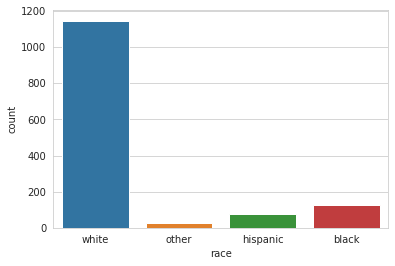

In [9]:
# Wykres słupkowy w Seaborn.
sns.countplot(data=wages, x='race')
plt.show()

Czy łączymy kategorię "other" z np. "hispanic"? A może ją usuwamy? Żadne z nich.

Rzućmy okiem, jak wyglądają relacje zmiennej "race" ze zmienną celu, tj. "earn". Skorzystajmy z grupowania i wyznaczmy średnie zarobki per rasa.

ps. Na chwilę przejdziemy do analizy dwuwymiarowej. W niektórych momentach trudno "sztywno" rozdzielić jedną od drugiej. Gdy trafimy na coś w analizie 1D, to przechodzimy "za ciosem" do analizy 2D/3D.

In [10]:
wages.groupby(['race']).earn.mean()

race
black       28372.093597
hispanic    25485.302691
other       32277.413809
white       33365.423212
Name: earn, dtype: float64

Poziom zarobków znacznie się różni pomiędzy kategoriami. "other" najbliżej do "white", jednak nie skorzystamy z tej możliwości, gdyż obserwacje tej kategorii mają nieco inną charakterystykę. Widać to, gdy pogrupujemy dane po jeszcze jednej zmiennej kategorycznej - "sex".

In [11]:
wages.groupby(['race', 'sex']).earn.mean()

race      sex   
black     female    26413.283253
          male      31778.720282
hispanic  female    21217.352092
          male      31818.390677
other     female    34164.346197
          male      29189.706266
white     female    23948.241172
          male      48951.731450
Name: earn, dtype: float64

In [12]:
wages.groupby(['race', 'sex']).earn.count()

race      sex   
black     female     80
          male       46
hispanic  female     46
          male       31
other     female     18
          male       11
white     female    715
          male      432
Name: earn, dtype: int64

### 1.2. Zmienne numeryczne.
#### Narzędzia z których korzystamy:
1. **Wykres gęstości** - w Seaborn dostępny poprzez `sns.displot()`.
2. **Statystyki podsumowujące** - w Pandas `df.describe()`, lub ew. `df.agg(['mean', 'min', 'max'])`.
3. **Tabela z liczbą brakujących wartości** - w Pandas `df.isnull().sum()`.
4. **Wykres pudełkowy** - w Seaborn dostępny poprzez `sns.boxplot`.
#### Uwagi wstępne:
* Podczas analizy zmiennych ciągłych staramy się ocenić:
    * Kształt rozkładu – interesuje nas, czy rozkład jest: normalny, jednostajny, symetryczny, skośny, wielomodalny. Oceniamy za pomocą wykresu gęstości.
    * Centrum rozkładu - mierzymy ją za pomocą miar tendencji centralnej, jak np. średnia, czy mediana.
    * Rozrzut - mierzymy poprzez miary rozrzutu, np. odchylenie standardowe, wariancję.
* Zaczynamy od wykresu, by zdecydować:
    * Z jakich narzędzi skorzystać dalej (czy do podsumowania użyjemy średniej, czy mediany)?
    * Jakich transformacji wymagają zmienne (np. logarytmowanie w przypadku zmiennych skośnych)?

In [13]:
wages.dtypes
# Mamy 4 zmienne numeryczne: earn, height, ed, age.
# Naszą zmienną celu będzie "earn", a więc poziom zarobków. Będziemy się starali odgadnąć receptę na wysokie zarobki.

earn      float64
height    float64
sex        object
race       object
ed          int64
age         int64
dtype: object

##### Analiza zmiennej celu.

Zmienne ciągłe możemy ocenić np. poprzez policzenie ile razy dana wartość występuje w próbie - podobnie jak to robiliśmy dla zmiennych kategorycznych. Nie jest to jednak najlepszy pomysł, zwłaszcza w przypadku dużej liczby unikalnych wartości danej zmiennej - co nie jest rzadkością w przypadku zmiennych ciągłych.

In [14]:
wages.earn.round(0).value_counts()

999.0       13
995.0       10
1001.0       9
1002.0       9
1004.0       8
            ..
95331.0      1
43919.0      1
141453.0     1
63666.0      1
9575.0       1
Name: earn, Length: 1092, dtype: int64

Możemy również wykonać podział zmiennej na przedziały, np. za pomocą tabela z licznościami występowania poszczególnych kategorii (`.value_counts()`, jak w przypadku zmiennych kategorycznych). 

In [15]:
pd.cut(wages.earn, 10).value_counts()

(-416.628, 31706.19]        771
(31706.19, 63510.961]       444
(63510.961, 95315.732]      105
(95315.732, 127120.503]      34
(127120.503, 158925.274]     11
(158925.274, 190730.045]      8
(190730.045, 222534.815]      2
(254339.586, 286144.357]      2
(222534.815, 254339.586]      1
(286144.357, 317949.128]      1
Name: earn, dtype: int64

`pd.cut` tnie zmienną na przedziały o równych szerokościach, ale różnych licznościach obserwacji.

Mimo wszystko fajnie byłoby jednak podejrzeć kształt rozkładu. To właśnie robi histogram, który wyznacza liczbę obserwacji w danym przedziale.

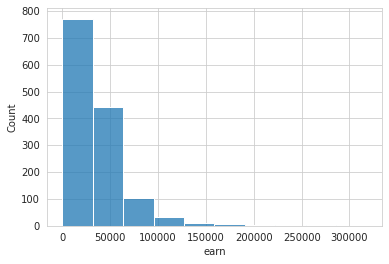

In [16]:
sns.histplot(wages.earn, bins=10)
plt.show()

Co możemy wyczytać z wykresu?
* Na osi x widzimy wartości jakie przyjmuje analizowana zmienna i szerokość słupków, która wskazuje jakie wartości przyjmują obserwacje składające się na wysokość danego słupka.
* Z osi y możemy odczytać liczbę obserwacji w każdym słupku.

Histogram nie jest jednak najlepszym wyborem, gdyż jego wygląd zależy od dobranych parametrów - liczba koszyków/podziałów. Znacznie lepszy od histogramu jest **wykres gęstości**.

#####  Narzędzie #1 - wykres gęstości.
Czemu wykres gęstości, a nie histogram?
* Na wykresie gęstości lepiej niż na histogramie widać wszystkie drobne górki.
* Kształt rozkładu nie jest zależny od liczby koszyków, etc.
* Warto zaznaczyć, że wykres gęstości nieco oszukuje na krańcach rozkładu ze względu na zastosowane wygładzanie.

Co odczytujemy z wykresu gęstości, na co zwrócić uwagę:
* symetryczność (ew. skośność),
* modalność (jeśli istnieje wielomodalność, to będziemy szukać jej przyczyny),
* typ (normalność, jednostajność).

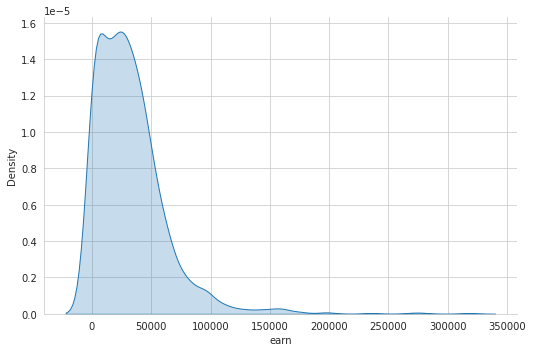

In [17]:
sns.displot(wages.earn, kind='kde', fill=True, aspect=1.5)
plt.show()
# Czyżby zawierała wartości ujemne? Później to sprawdzimy.

Co możemy odczytać z powyższego wykresu?
* Gołym okiem widać jednak znacznie większą liczbę szczegółów niż w przypadku histogramu.
* Widać, że rozkład ma 2 górki w okolicy 25k i ok. 10k. Nie były one widoczne na histogramie. Zapamiętajmy ten fakt. Później zbadamy z czego on wynika.
* Na osi x, podobnie jak w histogramie widzimy wartości, jakie przyjmuje analizowana zmienna.
* Oś y nie ma żadnej intuicyjnej interpretacji. Wartości na osi y oznaczają gęstość prawdopodobieństwa dla poszczególnych wartości na osi x. Wyższe wartości na osi y wskazują większą gęstość prawdopodobieństwa dla danej wartości.
    * W skrócie: im wyższa wartość na osi y, tym większe prawdopodobieństwo wystąpienia danej wartości
* Całe pole pod krzywą ma powierzchnię równą 1.
* Rozkład jest prawostronnie skośny. Posiada długi ogon z prawej strony. Wskazane jest jego "wyprostowanie".
* Nie jest to rozkład symetryczny. Odczytywanie z takiej zmiennej wartości średniej nie ma sensu. Średnia jest bardzo wrażliwa na wartości odstające, których tu nie brakuje.
* W rozkładach prawostronnie skośnych średnia będzie zawsze "przeciągnięta" w stronę długiego ogonu.

**Do zrobienia**:
* Przyjrzenie się wartościom ujemnym (czy wsytępują + ew. usunięcie ich; przed logarytmowaniem).
* Usunięcie skośności rozkładu (na potrzeby modelowania z użyciem regresji).
* Przyjrzenie się dwóm *peak*-om. Potencjalna dwumodalność. Z czego wynikają?

Przyjrzenie się wartościom ujemnym (czy wsytępują + ew. usunięcie ich; przed logarytmowaniem).

In [18]:
liczba_wartosci_ujemnych = wages.query('earn<0').shape[0]
print('Zbiór zawiera {} wartości ujemnych.'.format(liczba_wartosci_ujemnych))

Zbiór zawiera 11 wartości ujemnych.


In [19]:
wages = wages.query('earn>=0')

Usunięcie skośności rozkładu.

In [20]:
wages['earn_log10'] = np.log10(wages.earn)

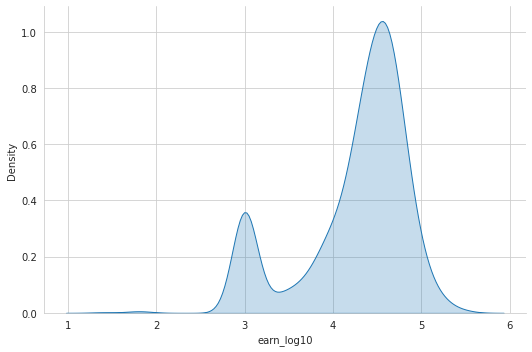

In [21]:
sns.displot(wages.earn_log10, kind='kde', fill=True, aspect=1.5)
plt.show()

Jak widać na powyższym wykresie, po logarytmowaniu zmiennej, 2 *peak*-i się uwidoczniły. Nie mamy już znacznej skośności, ale mamy za to rozkład bimodalny. Później zbadamy z czego to wynika. 

Logarytmowanie - co, jak i dlaczego?
* Należy o nim myśleć, jak o zmianie skali zmiennej, z addytywnej na multiplikatywną.
* Może w pewien sposób utrudniać interpretację wyników modelu, choć da się z tym żyć.
* Podstawa logarytmu nie ma wpływu na kształt rozkładu zmiennej po logarytmowaniu. Różnica będzie widoczna tylko w jednostkach.

Przyjrzyjmy się przykładowi obrazującymi obserwacje o zarobkach mniejszych niż 1300$.

> **Logarytm dziesiętny** (logarytm o podstawie 10) jest operacją matematyczną, która mierzy potęgę, do której trzeba podnieść liczbę 10, aby uzyskać daną wartość.

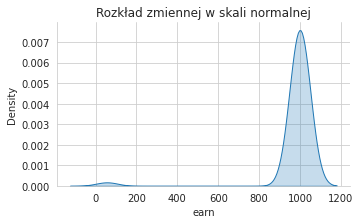

In [22]:
g = sns.displot(wages[wages.earn<1300].earn,
                kind='kde',
                fill=True,
                aspect=1.7,
                height=3)
plt.title("Rozkład zmiennej w skali normalnej")
plt.show()

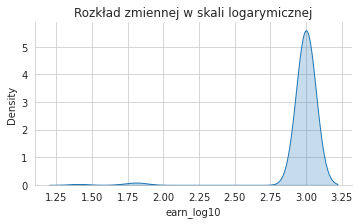

In [23]:
g = sns.displot(wages[wages.earn<1300].earn_log10,
                kind='kde',
                fill=True,
                aspect=1.7,
                height=3)
plt.title("Rozkład zmiennej w skali logarymicznej")
plt.show()

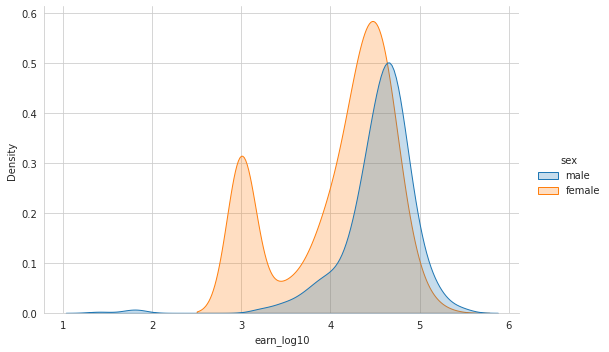

In [24]:
# Przechodzimy (ponownie) na chwilę do analizy wielowymiarowej - zmienna ciągła vs zmienna kategoryczna.
# Pozwoli nam to odpowiedzieć skąd wielomodalność rozkładu.
# REGUŁA KCIUKA: Gdy w próbie są dwie znacząco różne grupy, warto analizować rozkłady oddzielnie.
sns.displot(wages, x='earn_log10', kind='kde', fill=True, aspect=1.5, hue='sex')
plt.show()

Relatywnie wysokio zarabiające kobiety i przeciętnie zarabiający mężczyźni się sumowali na poprzednim wykresie.

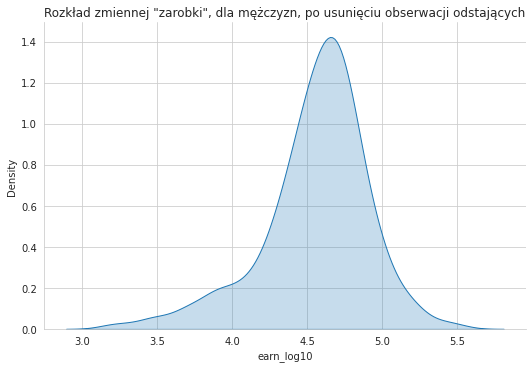

In [25]:
sns.displot(wages.query('sex=="male" & earn>1000').earn_log10, kind='kde', fill=True, aspect=1.5)
plt.title('Rozkład zmiennej "zarobki", dla mężczyzn, po usunięciu obserwacji odstających')
plt.show()

Dla ciekawych źródła badań:
* Książka, w której pierwszy raz użyto wyników badań ankietowych: ["Data Analysis Using Regression and Multilevel/Hierarchical Models"](http://ecologia.ib.usp.br/curso_r/lib/exe/fetch.php/bie5782:00_curso_avancado:uriarte:gelman_hill2007_data_analysis_using_regression_and_multilevel-hierarchical_models.pdf).
* Strona autora książki: [Andrew Gelman - professor of statistics and political science at Columbia University](http://www.stat.columbia.edu/~gelman/).
* Dokładny opis metodologii badań: [Social Indicators and the Study of Inequality](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1018735)
* W folderze "materiały dodatkowe" zamieściłem paper "Social Indicators and the Study of Inequality".
    
    
> *We use as a running example the  Social Indicators Survey, a telephone survey of New York City families conducted every two years by the Columbia University School of Social Work.*

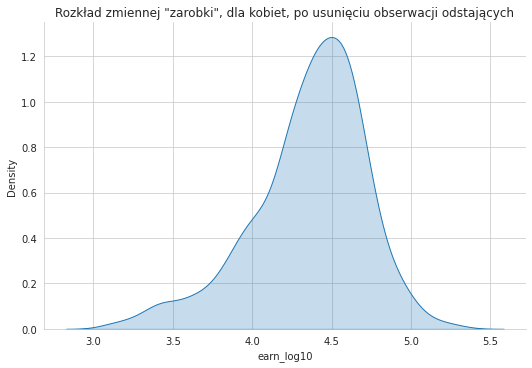

In [26]:
### Czemu wyświtlamy rozkład tylko dla tych kobiet, które zarabiają powyżej 1200$?
    ### Jest dosyć duża liczba obserwacji, wśród samych kobiet, które zarabiają w okolicy 980$-1030$.
    ### Na podstwaie tego zbioru nie jesteśmy w stanie opisać tego zjawiska.
    ### Żadna zmienna objaśniająca nie tłumaczy tego zjawiska.
    ### Możemy postawić hipotezę, że jest to pewne świadczenie socjalne dla kobiet (żaden inny mężczyzna nie miał przychodów w tym przedziale).
    
sns.displot(wages.query('sex=="female" & earn>1200').earn_log10, kind='kde', fill=True, aspect=1.5)
plt.title('Rozkład zmiennej "zarobki", dla kobiet, po usunięciu obserwacji odstających')
plt.show()

In [27]:
wages.query('earn>800 & earn< 1200') # 172 obserwacje; ponad 12% naszej próby

,earn,height,sex,race,ed,age,earn_log10
11,1002.307155,160.4010,female,white,14,54,3.001001
15,992.832346,152.5524,female,white,12,31,2.996876
20,1000.218306,170.3832,female,white,9,25,3.000095
31,1004.095614,152.4000,female,white,12,48,3.001775
33,984.761813,173.3550,female,white,12,59,2.993331
...,...,...,...,...,...,...,...
1321,1013.288422,159.2072,female,hispanic,13,36,3.005733
1327,1007.816761,158.3690,female,white,15,52,3.003382
1331,1000.885643,164.8968,female,white,16,26,3.000384
1341,1006.469902,161.2392,female,white,14,43,3.002801


In [28]:
wages.query('earn>800 & earn< 1200').sex.value_counts()

female    172
Name: sex, dtype: int64

Zarobki w ok. 1000$, a "rasa".

In [29]:
wages.query('earn>800 & earn< 1200').race.value_counts(normalize=True)
# Rozkład zmiennej "rasa" podany we frakcjach, dla kobiet zarabiających ok. 1000$.

white       0.854651
black       0.069767
hispanic    0.058140
other       0.017442
Name: race, dtype: float64

In [30]:
wages.query('sex=="female"').race.value_counts(normalize=True)
# Rozkład zmiennej "rasa" podany we frakcjach, dla wszystkich obserwacji.

white       0.832363
black       0.093132
hispanic    0.053551
other       0.020955
Name: race, dtype: float64

Zarobki w ok. 1000$, a "edukacja".

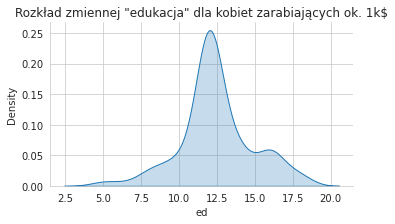

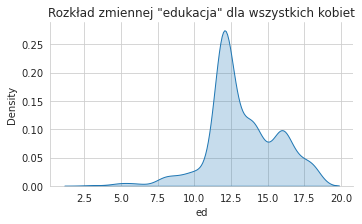

In [31]:
a = sns.displot(wages.query('earn>800 & earn< 1200 & sex=="female"').ed, kind='kde', fill=True, aspect=1.7, height=3)
plt.title('Rozkład zmiennej "edukacja" dla kobiet zarabiających ok. 1k$')
b = sns.displot(wages.query('sex=="female"').ed, kind='kde', fill=True, aspect=1.7, height=3)
plt.title('Rozkład zmiennej "edukacja" dla wszystkich kobiet')
plt.show()

In [32]:
wages.query('earn>800 & earn< 1200').ed.value_counts(normalize=True).head()
# Rozkład zmiennej "rasa" podany we frakcjach, dla kobiet zarabiających ok. 1000$.

12    0.470930
16    0.098837
14    0.087209
13    0.075581
10    0.052326
Name: ed, dtype: float64

In [33]:
wages.query('sex=="female"').ed.value_counts(normalize=True).head()
# Rozkład zmiennej "rasa" podany we frakcjach, dla wszystkich obserwacji.

12    0.391153
14    0.132712
16    0.125728
13    0.100116
15    0.050058
Name: ed, dtype: float64

In [34]:
wages.query('sex=="female"').ed.median()

13.0

In [35]:
wages.query('earn>800 & earn< 1200 & sex=="female"').ed.median()

12.0

In [36]:
wages.query('sex=="female"').ed.mean()

13.237485448195576

In [37]:
wages.query('earn>800 & earn< 1200 & sex=="female"').ed.mean()

12.44186046511628

Zarobki w ok. 1000$, a "wiek".

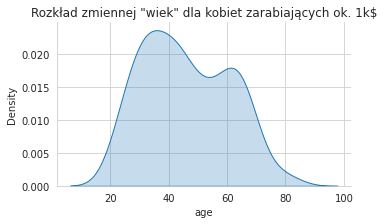

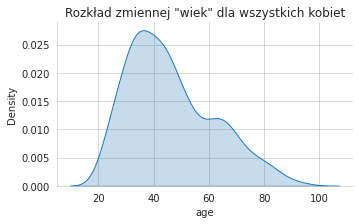

In [38]:
a = sns.displot(wages.query('earn>800 & earn< 1200 & sex=="female"').age, kind='kde', fill=True, aspect=1.7, height=3)
plt.title('Rozkład zmiennej "wiek" dla kobiet zarabiających ok. 1k$')
b = sns.displot(wages.query('sex=="female"').age, kind='kde', fill=True, aspect=1.7, height=3)
plt.title('Rozkład zmiennej "wiek" dla wszystkich kobiet')
plt.show()

In [39]:
wages.query('sex=="female"').age.agg(['mean', 'median'])

mean      46.188591
median    43.000000
Name: age, dtype: float64

In [40]:
wages.query('earn>800 & earn< 1200 & sex=="female"').age.agg(['mean', 'median'])

mean      45.906977
median    43.500000
Name: age, dtype: float64

Trudno na podstawie powyższych wskazać jednoznaczną przyczynę tego zjawiska.

Inne popularne operacje, które stosujemy w ramach transformacji zmiennych:
1. Standaryzacja:
    * Zmienna ma średnią 0 i sd = 1, tzw. z-score.
    * Pozwala uśrednić i porównywać różne cechy ze sobą na tej samej skali.
2. Normalizacja - przekształca wartości cech, skalując je do określonego zakresu, zwykle od 0 do 1. 
2. Przekształcenie Boxa-Coxa.

##### Narzędzie #2 - statystyki podsumowujące.

Niezawodne narzędzie do szybkiego podsumowania rozkładu danej zmiennej. Nie jest jednak bez wad. Choć bardzo dokładne, to brak tu niektórych detali. Np. nie sposób tu odkryć 2 *peak*-i, które zobaczyliśmy na wykresie gęstości.

In [41]:
wages.earn.describe()

count      1368.000000
mean      32707.530929
std       31245.870714
min          25.507379
25%       10554.875194
50%       27046.575835
75%       44514.381797
max      317949.127955
Name: earn, dtype: float64

Co możemy odczytać z tabeli?
* Skośność zmiennej (mediana - poniżej widoczna, jako `50%` - jest znacznie mniejsza od średniej).
* **Mediana** - 50-ty percentyl.
    * środek rozkładu,
    * dla rozkładów skośnych znacznie bardziej użyteczna niż średnia,
    * nie jest wrażliwa na wartości odstające - długie ogony,
    * 50% obserwacji wartości przyjmuje wartości mniejsze niż 26877.870178, a 50% większe.
* Wartości **minimalne** i **maksymalne** - pozwalają nam stwierdzić, czy w zbiorze zawarte są jakieś anomalie, błędy pomiaru.
    * Wartość minimalna - wskazuje nam na pewne potencjalne błędy, być może wartości nietypowe.
    * Wartość maksymalna - w tym wypadku jest ok.
* Wartość **średnia** - bardziej czuła, niż mediana. Ma to swoje plusy i minusy.
    * Minus - wrażliwa na obserwacje odstające i skośne rozkłady.
    * Plusy - pokazuje nawet subtelne różnice pomiędzy pomiarami, np. w przypadku grupowania względnem zmiennej kategorycznej i badania różnic w przeciętnej wartości zmiennej ciągłej.
* Warto zwrócić uwagę na 25% i 75% - tzw. **rozkład kwartylowy** (rozstęp ćwiartkowy, rozstęp międzykwartylowy). Pokazują jakie wartości przyjmuje środkowa połowa naszej próby, odrzucając wartości leżące na krańcach rozkładu. Mówi nam więc o "typowych" zarobkach w próbie. W mojej ocenie jest nieco leprzy w ocenie rozkładu, niż pojedyncza wartość - mediana.
* **Odchylenie standardowe** - bazuje na wartości średniej, więc jest dobrą miarą rozrzutu w przypadku rozkładów symetrycznych. Tu lepszą miarą rozrzutu jest rozkład kwartylowy.

**Czemu średnia jest gorsza od mediany dla skośnych rozkładów?**

In [42]:
wages.earn.describe().round(1)
# Prezydent w styczniu 2023: "Średnio drodzy obywatele zarabialiście 32 707.5$"

count      1368.0
mean      32707.5
std       31245.9
min          25.5
25%       10554.9
50%       27046.6
75%       44514.4
max      317949.1
Name: earn, dtype: float64

In [43]:
wages.earn.sort_values(ascending=False)

1252    317949.127955
387     278213.531776
232     270275.894208
408     235388.719223
202     198835.433852
            ...      
746        977.095394
664         69.691493
805         66.542836
556         56.378134
1059        25.507379
Name: earn, Length: 1368, dtype: float64

In [44]:
# załóżmy, że najbogatszy pomnożył swój majątek 100-krotnie
wages.loc[1252, 'earn'] = wages.loc[1252, 'earn']*100

In [45]:
wages.earn.describe().round(1)
# Prezydent w styczniu 2024:
    # "Postęp jest znaczący. Średnio drodzy obywatele zarabialiście 55 717$!"
    # "Wasze przeciętne zarobki wzrosły o ponad 70%!!!"

count        1368.0
mean        55717.0
std        859290.9
min            25.5
25%         10554.9
50%         27046.6
75%         44514.4
max      31794912.8
Name: earn, dtype: float64

Zwróć uwagę, że w obu powyższych podsumowaniach **mediana jest identyczna**!!!

In [46]:
wages.loc[1252, 'earn'] = wages.loc[1252, 'earn']/100 # przywrócenie outlier-a do pierwotnej wartości

##### Narzędzie #3 - weryfikacja brakujących wartości.
Ogólna zasada: jeśli w danej zmiennej jest ich dużo, to może mieć to wpływ na inne zmienne i na dalszą analizę.
* < 1%  - można zignorować,
* \>= 10% - należy zastanowić się z czego wynikają.
    * Szukamy w takim wypadku zależności i pewnego związku pomiędzy brakami, a innymi zmiennymi.
    * Jeśli brak związku, to możemy założyć, że występują losowo i np. usunąć te obserwacje.
    * Jeśli istnieje związek z którąś ze zmiennych, to mówimy o tym, że próba jest **obciążona**. Za przykład może posłużyć zmienna `ed` - jeśli, ktoś z ankietowanych wstydził się np. niskiego wykształcenia, to średnia dla zmiennej będzie zawyżona, co wpłynie na interpretację i wyniki naszego modelu.
    * Obciążenie próby możemy interpretować, jako pewien błąd, który może prowadzić do błędnych/niereprezentatywnych dla całej populacji wyników.

In [47]:
wages.earn.isnull().sum()

0

Zbiór z którego korzystamy nie zawiera już brakujących wartości. Został uprzednio przygotowany. Warto w tym momencie zauwazyć, że:
> Większość braków danych nie jest całkowicie przypadkowa, jak można zauważyć na podstawie samych danych. Na przykład różne wskaźniki braku odpowiedzi dla osób białych i czarnych wskazują, że pytanie dotyczące "zarobków" w Badaniu wskaźników społecznych nie jest przypadkowo brakujące.

##### Narzędzie #4 - wykres pudełkowy.
W metodzie z której będziemy korzystać (regresja liniowa) obserwacje odstające mają znaczący wpływ. Jest to prawdą zarówno dla zmiennych objaśniających, jak i zmiennej objaśnianej.

Jeśli nie planujemy usuwania skośności rozkładu, to warto obsłużyć wartości odstające, np. poprzez ich usunięcie o ile jest ich niewiele i możemy sobie na to pozwolić.

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


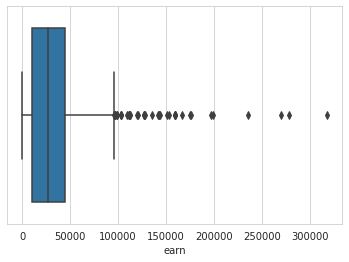

In [48]:
sns.boxplot(wages.earn)
plt.show()

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


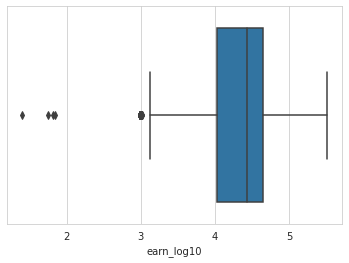

In [49]:
# zmienna zlogarytmowana
sns.boxplot(wages.earn_log10)
plt.show()

Co możemy odczytać z powyższego wykresu?
* **Mediana** - środek wykresu, horyzontalna linia.
* **Drugi i trzeci kwartyl**, a więc 50% typowych obserwacji w zbiorze (rozstęp międzykwartylowy).
* **Wąsy** - prezentujące granice w jakich znajdują się typowe obserwacje. Wąsy są rysowane na odległość 1.5IQR (1.5 rozstępu międzykwartylowego):
    * od granicy pomiędzy pierwszym i drugim kwartylem (w "dół"),
    * od granicy pomiędzy trzecim i czwartym kwartylem (w "górę"),
    * lub do skrajnej obserwacji (w scenariuszu, gdy nie mamy obserwacji odstających) 
* **Kropki poza granicami** - obserwacje, które w ramach danej zmiennej nie mieszczą się w granicy 1.5IQR od drugiego, lub trzeciego kwartylu.

Oznaczanie obserwacji odstających - reguła 3 sigm vs 1.5IQR:
* **Reguła 3 sigm** - jest oparta na odchyleniu standardowym i jest stosowana w przypadku, gdy założony jest rozkład normalny danych. Zgodnie z tą regułą, zakres wartości odstających jest zdefiniowany jako trzykrotne odchylenie standardowe wokół średniej. W przybliżeniu 99,7% danych znajduje się w granicach trzech odchyleń standardowych od średniej, a wartości leżące poza tym zakresem są uznawane za wartości odstające.
* **Reguła 1.5IQR** opiera się na rozstępie ćwiartkowym (interquartile range - IQR) i nie wymaga założenia dotyczącego rozkładu danych. IQR jest różnicą między górnym i dolnym kwartylem (Q3 - Q1). Według tej reguły, wartości odstające są definiowane jako wartości mniejsze niż Q1 - 1,5 * IQR lub większe niż Q3 + 1,5 * IQR. Wartości leżące poza tym zakresem są uznawane za wartości odstające.
![](zdjęcia/regula_3_sigm.png)

Wprowadźmy nowe pojęcia:
* **Metody parametryczne**:
    * Metody zakładające konkretny rozkład prawdopodobieństwa dla populacji badanej zmiennej.
    * Na podstawie danych próbki szacuje się wartości tych parametrów.
    * Metody parametryczne są bardziej efektywne w wykorzystaniu danych, jeśli założenia dotyczące rozkładu danych są spełnione.
    * Przykładem jest reguła 3 sigm, lub regresja liniowa.
* **Metody nieparametryczne**:
    * Nie wymagają spełnienia konkretnego założenia dotyczącego rozkładu danych populacji.
    * Nie estymują konkretnych parametrów populacji.
    * Opierają się na porównywaniu np. rang.
    * Są bardziej elastyczne niż parametryczne i mogą być stosowane w przypadku, gdy dane nie spełniają założeń dotyczących rozkładu.
    * Przykładem metod nieparametrycznych jest reguła 1.5IQR, lub algorytm drzewa decyzyjnego.
    
**Do zrobienia**:
* Usuńmy obserwacje odstające względem zmiennej "earn_log10".

In [50]:
wages = wages.query('earn>1100')

#### Przyjrzyjmy się jeszcze zmiennej "age".

In [51]:
wages.head()

,earn,height,sex,race,ed,age,earn_log10
0,79571.299011,187.6806,male,white,16,49,4.900756
1,96396.988643,168.2242,female,white,16,62,4.984063
2,48710.666947,161.9758,female,white,16,33,4.687624
3,80478.096153,160.5788,female,other,16,95,4.905678
4,82089.345498,160.2232,female,white,17,43,4.914287


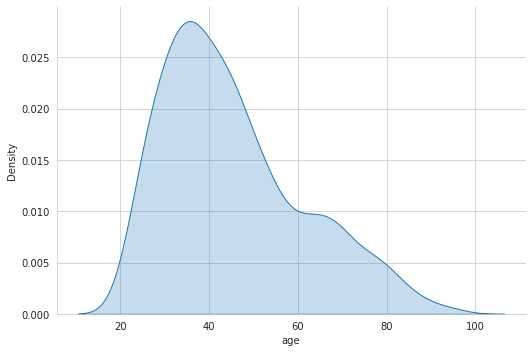

In [52]:
sns.displot(wages.age, kind='kde', fill=True, aspect=1.5)
plt.show()

Nie jest przesadnie skośna, choć widać pewną tendencję, która może być odzwierciedleniem dla całej populacji. Spróbujmy ją nieco "wyprostować". Skorzystamy z niej później w ramach pewnego eksperymentu.

In [53]:
wages['age_log10'] = np.log10(wages.age)

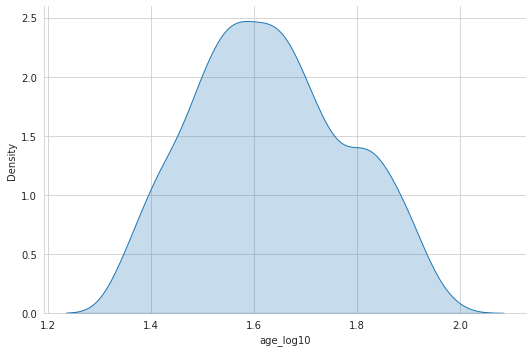

In [54]:
sns.displot(wages.age_log10, kind='kde', fill=True, aspect=1.5)
plt.show()

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


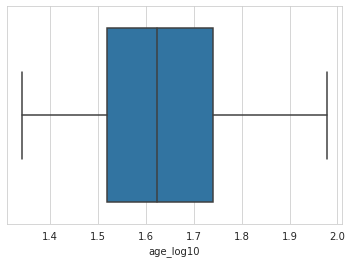

In [55]:
# zmienna zlogarytmowana
sns.boxplot(wages.age_log10)
plt.show()

Z uwagi na pewne cele dydaktyczne, pominiemy zmienne "ed" i "height". ;-)

## 2. Analiza wielowymiarowa.

Podczas analizy jednowymiarowej badaliśmy rozkłady naszych zmiennych, celem zbudowania sobie obrazu "typowych"obserwacji i ich ew. korekty (usunięcie skośności, wartości odstających). Pewnego rodzaju bonusem mogła być np. dostrzeżona wielomodalność, która kazała nam poszukiwania pewnych ukrytych wzorców w naszych danych.

Na zakończenie eksploracyjnej analizy danych chcemy posiadać:
1. Zmienne gotowe do modelowania algorytmem, który wybraliśmy (regresja logistyczna, posiadająca pewne założenia dotyczące rozkładów zmiennych i wrażliwa na obserwacje odstające - wszystko to musieliśmy obsłużyć)
2. Wiedzę dotyczącą tego:
    * **jakie zmienne**,
    * **w jakiej formie**,
    * **i w jakich kombinacjach powinniśmy uwzględnić w naszym modelu**.

Możemy powiedzieć, że punkt 1 mamy za sobą. Pora na punkt 2. :-)
Zatrzymajmy się na chwilę i pomyślmy o naszym celu.
* **CEL STRATEGICZNY** &rarr; Dostarczenie wartości biznesowej (rozumianej, jako: zyska, marża, utrzymanie obecnych klientów, pozyskanie nowych klientów, etc.).
    * **CEL OPERACYJNY** &rarr; Budowa modelu predykcyjnego o odpowiedniej jakści i modelu parametrycznego pozwalającego powiązać skutki z przyczynami.
        * **Taktyka #1:** <u>użycie regresji liniowej</u>.
            * W szczegółach omówimy ją później. Na ten moment warto powiedzieć o kilku niuansach.
            * ***<u style='color:green;'>Posiada szereg założeń, m.in. brak współliniowości pomiędzy zmiennymi objaśniającymi</u>***.* Metoda parametryczna - dużą część czasu zajmuje przygotowanie zbioru ABT.
            * Bardzo dobrze radzi sobie z ciągłością zmienncyh.
            * ***<u style='color:green;'>Sama nie radzi sobie odkrywaniem interakcji pomiędzy zmiennymi</u>***.
        * **Taktyka #2:** <u>użycie drzewa decyzyjnego</u>.
            * Metoda nieparametryczna. Przygotowanie danych nie jest aż tak istotne, jak w regresji liniowej.
            * Nacisk kładziony na:
                * Dobór hiperparametrów modelu.
                * Walidację, celem uniknięcia zbytniego dopasowania do danych uczących (problem przeuczenia modelu).
                
Zwróćmy uwagę na dwa elementy, podkreślone i pokolorowane na zielono. Musimy się z nimi zapoznać i zbadać je, jeśli chcemy skorzystać z regresji liniowej.
##### Poszukiwanie interakcji pomiędzy zmiennymi - opis.


##### Poszukiwanie interakcji pomiędzy zmiennymi - przykład.
Wyobraź sobie, że przed domem masz trawnik, który nie jest w najlepszym stanie. Trawa jest krótka i wysuszona, a ziemia jałowa. Trawie brakuje gęstości i długości, a ziemi składników odżywczych. Zaczynasz więc eksperymentować. Kupujesz odpowiedni nawóz i regularnie go podlewasz. Posiadając analityczny umysł i nową wiedzę dotyczącą wnioskowania parametrycznego postanawiasz prowadzić dziennik, w którym reularnie notujesz takie informacje, jak:
* o ile trawnik urusł od ostatniego koszenia (cm/tydzień),
* tygodniow skalę podlewania w litrach/m2 (odczytywaną z licznika),
* tygodniową skalę opadów w litrach/m2 z ostatnich 7 dni,
* średnią temperaturę z ostatnich 7 dni,
* fakt nawożenia trawnika specjalistycznym nawozem,
* subiektywny wygląd trawnika (barwa i gęstość).

Eksperymentujesz i prowadzisz regularne pomiary przez cały sezon. W zimę przenosisz dane do arkusza, uruchamiasz Pythona i zaczynasz analizę...
![](zdjęcia/trawnik.jpg)
Starasz się ocenić co miało wpływ na wzrost. W modelu regresji uwzględniasz sumę wody i deszczu jakie spadły na trawnik w ciągu tygodnia. Uwzględniasz też fakt nawożenia. Model zdaje się jednak nie tłumaczyć w pełni zjawiska, jakim jest wzrost trawnika wyrażony w cm. Pierwsze konkluzje są następujące:
* Były tygodnie w których trawnik był mocno podlewany, a mimo to nie notowano dużych wzrostów.
* Były tygodnie w których trawnik był sowicie nawożony, a mimo to nie notowano dużych wzrostów.
* W innych tygodniach, przy znacznie mniejszym nawilżeniu trawa rosła bardzo mocno.
    * Czy zatem trawa nie potrzebuje wody do szybkich wzrostów?
    * A może było momentami za dużo wody? (to nawet może mieć sens ;-))

Po chwili namysłu uwzględniasz w modelu interakcję `nawożenie`:`nawilżenie`. Teraz model działa znacznie lepiej. Opisuje znaczną zmienność zmiennej celu i posiada zadowalającą jakość. Tygodnie w których trawa była obficie nawodniona i nawożona były tygodniami o największym jej wzroście. Wpływ obu czynników jest raczej multiplikatywny, niż addytywny.

Moglibyśmy posypywać trawę nawozem każdego tygodnia, albo wylać na nią hektolitry wody, lecz dopiero połączenie obu uczynników, w odpowiednich proporcjach sprawia, że trawa rozrasta się bardzo szybko. To właśnie jest modelowy przykład interakcji.

Poszukując interakcji w naszym zbiorze, szukamy synergii pomiędzy zmiennymi objaśniającymi, powodującej zwiększone, bądź zmniejszone oddziaływanie na zmienną celu.

Przejdźmy do nieco bardziej formalnej definicji.
> Interakcja pomiędzy zmiennymi objaśniającymi oznacza, że wpływ jednej zmiennej objaśniającej (x1) na zmienną celu (y) zależy od wartości innej zmiennej objaśniającej (x2). Wpływ tych zmiennych na zmienną celu nie jest jednostajny, ale zależy od ich wzajemnego oddziaływania.

> W regresji liniowej, zwykle zakładamy, że wpływ każdej zmiennej objaśniającej na zmienną celu jest niezależny od innych zmiennych objaśniających. Jednak w przypadku interakcji, istnieje przekonanie, że wpływ jednej zmiennej na zmienną celu może zależeć od wartości drugiej zmiennej.

##### Współliniowość - opis zjawiska
Kolejnym elementem, który musimy uwzględnić w naszym poszukiwaniach jest współliniowość. Oznacza ona, że istnieje silna zależność lub korelacja między zmiennymi objaśniającymi.

W kontekście regresji liniowej, współliniowość oznacza, że jedna lub więcej zmiennych objaśniających jest silnie skorelowana lub zależna od innych zmiennych objaśniających.

##### Współliniowośc - skutki
Prowadzi ona do sytuacji w których trudno jest odróżnić wpływ poszczególnych zmiennych objaśniających na zmienną zależną. Korelacja między zmiennymi objaśniającymi wprowadza zakłócenia i trudności w interpretacji wyników modelu.

##### Współliniowość - eliminacja
Będziemy poszukiwać zmiennych, które są ze sobą silnie skorelowane. Spośród takich grup/-y zmiennych wybierzemy reprezentanta/-ów do modelowania.

### 2.1. Zmienna kategoryczna vs zmienna kategoryczna.

#### Narzędzia z których skorzystamy:
1. **Tabela krzyżowa**. `pd.crosstab`, lub `groupby`.

#### Uwagi:
* W przypadku zmiennych kategorycznych, o ile nie analizujemy jednocześnie dwóch zmiennych porządkowych, to nie występuje znaczne zagrożenie wspóliniowością. Wynika to z natury zmiennych kategorycznych (nominalnych), które nie mają naturalnej kolejności lub wartości numerycznej.
    * PS. W przypadku dwóch zmiennych kategorycznych, które nie są porządkowe, ryzyko współliniowości może wystąpić, jeśli jedna lub więcej kategorii jednej zmiennej są w pełni przewidywalne na podstawie kategorii drugiej zmiennej. O to jednak zadbamy podczas budowy modelu.

In [56]:
wages.dtypes

earn          float64
height        float64
sex            object
race           object
ed              int64
age             int64
earn_log10    float64
age_log10     float64
dtype: object

In [57]:
wages.select_dtypes('object').head()

,sex,race
0,male,white
1,female,white
2,female,white
3,female,other
4,female,white


Zawsze najpierw warto rzucić okiem na liczności, zanim przjdziemy do średnich. Bez weryfikacji liczności, możemy zbyt mocno uwierzyć w obecność efektu, który w istocie nie jest istotny statystycznie. W poniższym przypadku brakuje nam wystarczających dowodów (mamy zbyt małą liczbę obserwacji) na to, że w przypadku rasy "other" kobiety rzeczywiście zarabiają więcej niż mężczyźni. Możemy to wstępnie stwierdzić po obserwacji przedziałów ufności, które w tym przypadku mocno się na siebie nakładały. Finalne potwierdzenie uzyskamy w modelu regresji liniowej. 

In [58]:
pd.crosstab(index=wages.sex,
            columns=wages.race,
            values=wages.earn,
            aggfunc='count'
           )

race,black,hispanic,other,white
sex,,,,
female,68,36,15,568
male,44,30,10,421


In [59]:
pd.crosstab(index=wages.sex,
            columns=wages.race,
            values=wages.earn,
            aggfunc='mean'
           )

race,black,hispanic,other,white
sex,,,,
female,30898.923816,26833.785778,40796.673314,29887.303276
male,33225.401927,32880.881099,32113.636655,50230.860286


Podobne podsumowanie możemy uzyskać z użyciem metody `groupby`.

In [60]:
podsumowanie = wages.groupby(['race', 'sex']).earn.mean() # earn.agg([])
pd.DataFrame(podsumowanie)

earn
race     sex                 
black    female  30898.923816
         male    33225.401927
hispanic female  26833.785778
         male    32880.881099
other    female  40796.673314
         male    32113.636655
white    female  29887.303276
         male    50230.860286

### 2.2. Zmienna ciągła vs zmienna ciągła.
#### Narzędzia z których korzystamy:
1. **Wykres punktowy z prostą regresji** - `sns.lmplot`, ew. `sns.regplot`.
2. **Tabela korelacji** - `wages.corr()` + ew. mapa gęstości (ang. *heatmap*) macierzy korelacji.
3. **Wykres punktowy** - `sns.scatterplot(data=wages, x='age', y='ed', hue='earn')`. Pozwala zbadać relację pomiędzy trzema zmiennymi ciągłymi.

#### Uwagi:
* Każdą z badanych zmiennych można doprowadzić do postaci jakościowej, dzieląc na przedziały i analizować używając np. tabeli krzyżowej. Nie jest to jednak optymalne. Tracimy wtedy część informacji.

##### Narzędzie #1 - wykres punktowy.
Staramy się na osi y umieszczać zmienną celu, a na osi x zmienne objaśniające. Chodzi o spójny sposób w jaki myślę o relacji pomiędzy zmiennymi. Przykładowo: wiek wpływa na zarobki.

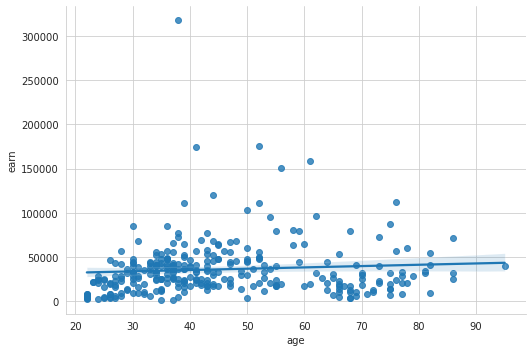

In [61]:
sns.lmplot(data=wages.sample(300, random_state=2001), x='age', y='earn', aspect=1.5)
plt.show()

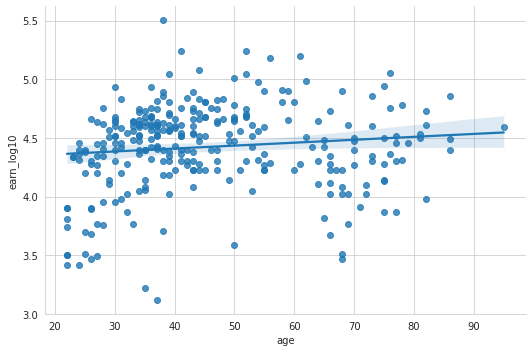

In [62]:
sns.lmplot(data=wages.sample(300, random_state=2001), x='age', y='earn_log10', aspect=1.5)
plt.show()
# Na skali logarytmicznej efekt ten jest lepiej widoczny.

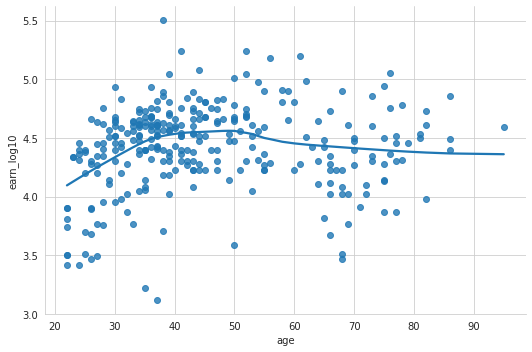

In [63]:
sns.lmplot(data=wages.sample(300, random_state=2001), x='age', y='earn_log10', aspect=1.5, lowess=True)
plt.show()

**Lowess** (ang. locally weighted linear regression) - metody wygładzania danych, która jest stosowana do aproksymacji nieliniowych relacji między zmiennymi.
Z powyższego wykresu można odczytać, że trend jest zgodny z intuicją, ponieważ:
* Gdy jesteśmy młodzi - zarabiamy niewiele z uwagi na brak doświadczenia i umiejętności.
* Gdy jesteśmy starzy, przechodzimy na emeryturę, ew. oddajemy część obowiązków. Pomimo dużego doświadczenia mamy nieco mniej sił, chęci, no i zdrowie już nie to.
* Zarabiamy najwięcej w wieku średnim, gdy:
    * mamy wystarczająco dużo doświadczenia i...
    * i nadal wystarczająco dużo energii.
    
##### Monotoniczność, lub jej brak.
Dodatkowo, duży minusem dla naszego pomysłu modelowania regresją liniową jest fakt, że zmienna "age" jest **niemonotoniczna** względem zmiennej "earn".

Gdy mówimy, że zmienna x jest niemonotoniczna względem y, oznacza to, że nie istnieje stały trend lub jednoznaczna zależność między zmienną x a zmienną y. Innymi słowy, wartości zmiennej x nie rosną ani nie maleją w sposób jednostajny wraz ze zmianami zmiennej y.

Brak monotoniczności sprawia, że nie jesteśmy w stanie aż tak dokładnie przedstawić związku pomiędzy zmiennymi, za pomocą regresji liniowej, która zakłada liniowy związek między x, a y.

W naszym przypadku pozostają nam następujące wyjścia:
1. Zaniechać modelowania z użyciem regresji i zmienić algorytm. (nie chcemy tego robić)
2. Zostawić próbę w takiej formie i pogodzić się z pewnymi ograniczeniami przyjętej metody.
3. Podzielić próbę na 2, lub nawet 3 części i zrobili niezależne modele. Podział nastąpiłby wg zmiennej "age".
    * `model_1` - dla zmiennej `age=(0, 40)`,
    * `model_2` - dla zmiennej `age=[40, 53)`,
    * `model_3` - dla zmiennej `age=[53, 100)`.
4. Wykonać dyskretyzację zmiennej "age", dowolną metodą i potraktowali ją jako zmienną kategoryczną, np. w następujący sposób: 
```python
wages['age_kat'] = pd.cut(wages.age, bins=[0, 40, 53, 100], labels=['młody', 'doświadczony', 'emeryt'])
```    

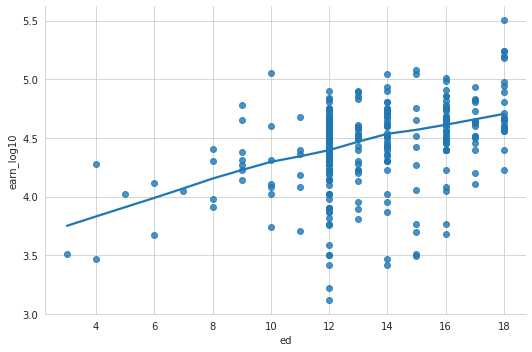

In [64]:
# Kolejna zmienna - przykład zmiennej monotonicznej.
# Wykres zastosowaniem metody lowess.
sns.lmplot(data=wages.sample(300, random_state=2001), x='ed', y='earn_log10', aspect=1.5, lowess=True)
plt.show()

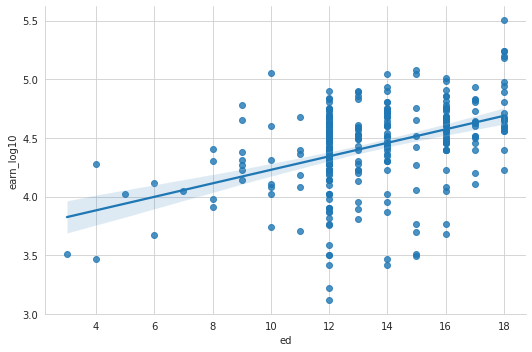

In [65]:
# Wykres bez zastosowania metody lowess - różnica jest subtelna.
# Takich zmiennych nam potrzeba! ;-)
sns.lmplot(data=wages.sample(300, random_state=2001), x='ed', y='earn_log10', aspect=1.5)
plt.show()

##### 2. Narzędzie #2 - tabela korelacji.

**Korelacja** - jest miarą statystyczną, która opisuje siłę i kierunek zależności między dwiema zmiennymi. Mierzy stopień, w jakim zmiany jednej zmiennej są związane ze zmianami drugiej zmiennej.

Korelacja jest wyrażana jako współczynnik korelacji, który może przyjmować wartości od -1 do 1. Wartość 1 oznacza doskonałą dodatnią korelację, co oznacza, że obie zmienne rosną wraz ze sobą proporcjonalnie. Wartość -1 oznacza doskonałą ujemną korelację, co oznacza, że jedna zmienna rośnie, podczas gdy druga maleje w sposób proporcjonalny. Wartość 0 oznacza brak korelacji lub brak zależności liniowej między zmiennymi.

Korelacja nie oznacza przyczynowości - wykrycie silnej korelacji między dwiema zmiennymi niekoniecznie oznacza, że jedna zmienna wpływa na drugą. Istnieje możliwość, że obie zmienne są zależne od innej, trzeciej zmiennej lub że występuje czynnik wspólny, który wpływa na obie zmienne.

Ważne jest również pamiętać, że korelacja odnosi się tylko do zależności liniowych między zmiennymi. Jeżeli zależność między zmiennymi jest nieliniowa, to korelacja może nie być odpowiednią miarą związku między nimi.

Interpretowanie wyników korelacji:
* 0 - 0.19 bardzo słaba,
* 0.2 - 0.39 słaba,
* 0.40 - 0.59 umiarkowana,
* 0.6 - 0.79 silna,
* 0.8 - 1 bardzo silna.

In [66]:
wages[['earn', 'earn_log10', 'ed', 'age', 'age_log10', 'height']].corr()

,earn,earn_log10,ed,age,age_log10,height
earn,1.000000,0.822075,0.341007,0.082401,0.131867,0.240463
earn_log10,0.822075,1.000000,0.332768,0.108939,0.172456,0.233478
ed,0.341007,0.332768,1.000000,-0.132069,-0.101029,0.104410
age,0.082401,0.108939,-0.132069,1.000000,0.982993,-0.137403
age_log10,0.131867,0.172456,-0.101029,0.982993,1.000000,-0.131799
height,0.240463,0.233478,0.104410,-0.137403,-0.131799,1.000000


Tabela jest relatywnie mała. Nie ma więc potrzeby budowania *heatmap*-y. [Tu znajduje się przykład pokazujący jak to można zrobić](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

Co można odczytać z powyższej tabeli?
* Że związek pomiędzy zmiennymi objaśniającymi, a zmienną celu jest relatywnie słaby. Brak tu mocnych zmiennych.
* Najmocniejsza zmienna objaśniająca - `ed`. Jest słabo skorelowana z pozostałymi zmiennymi objaśniającymi, co należy odbierać na plus - zmienne się wzajemnie nie wykluczają z modelu liniowego.
* Zmienna `ed` będzie pierwszą od której rozpoczniemy modelowanie.

##### 3. Narzędzie #3 - wykres punktowy.

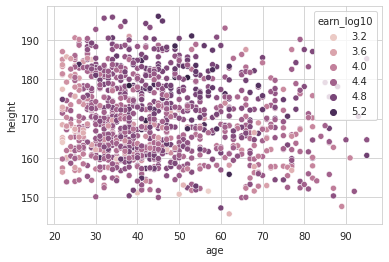

In [67]:
sns.scatterplot(data=wages, x='age', y='height', hue='earn_log10')
plt.show()

Gdyby interakcja istniała, to na powyższym wykresie dostrzegalne byłoby zakrzywienie trendu, np. w kształcie litery "U". Tu niestety nie jest to dostrzegalne. Być może dostrzegalny jest delikatne zakrzywienie, ale nie jest to nic szczególnie rzucającego się w oczy.

### 2.3. Zmienna kategoryczna vs zmienna ciągła.
#### Narzędzia z których korzystamy:
1. **Wykres pudełkowy dla każdego poziomu zmiennej kategorycznej** - `sns.boxplot(df, x='category', y='float')`.
2. **Wielopoziomowy wykres gęstości**
    * `sns.displot(df, x='float', kind='kde', hue='category', fill=True)`
    * ew. `sns.displot` i użycie atrybutu `hue` i `col`, lub `sns.FacetGrid`.
3. **Wykres słupkowy** - `sns.barplot` i użycie atrybutu `hue`.
4. **Wykres punktowy z prostą regresji** - `sns.lmplot(data=df, x='float_x', y='floay_y', hue='category', aspect=1.5)`
##### 1. Narzędzie #1 - wykres pudełkowy dla każdego poziomu zmiennej kategorycznej.

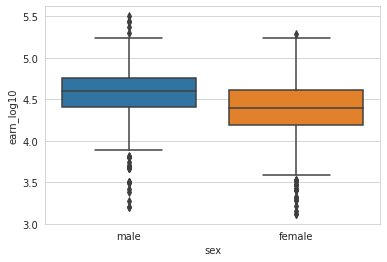

In [68]:
sns.boxplot(data=wages, x='sex', y='earn_log10')
plt.show()

Rozkład zmiennej "earn_log10" jest symetryczny po rozdzieleniu względem płci, jednak gdyby taki nie był, to moglibysmy go porównać z użyciem wykresu pudełkowego, rysując go osobno dla każdego poziomu zmiennej kategorycznej.

Na powyższym przykładzie widać, że mężczyźni w okolicy 25 percentyla zarabiają mniej więcej tyle ile kobiety w okolicy 50 percentyla, a więc mediany.

Zmienna "sex" jest więc relatywnie dobrym predyktorem zarobków.

##### 2. Narzędzie #2 - wielopoziomowy wykres gęstości.

By nanieść kilka rozkładów na jeden wykres, a więc pogrupować rozkład zmiennej numerycznej względem zmiennej kategorycznej wystarczt użyć parametru `hue` (ang. *hue* - odcień).

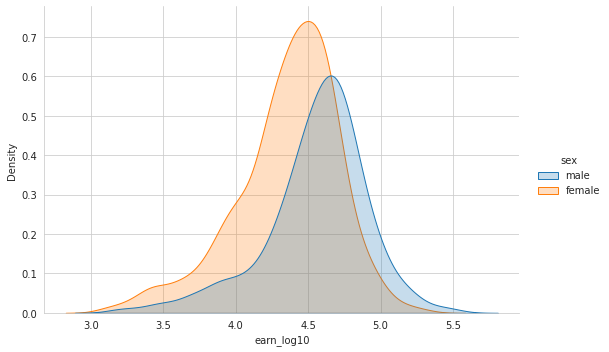

In [69]:
sns.displot(wages, x='earn_log10', kind='kde', hue='sex', fill=True, aspect=1.5)
plt.show()

Na tego wypu wykresie odkryliśmy dwumodalność w zarobkach kobiet, której nie dało się wytłumaczyć. Teraz zbiór jest oczyszczony, więc rozkłady są symetryczne. Widać na nim doskonale, że rozkład zarobków pomiędzy kobietami i mężczyznami różni się.

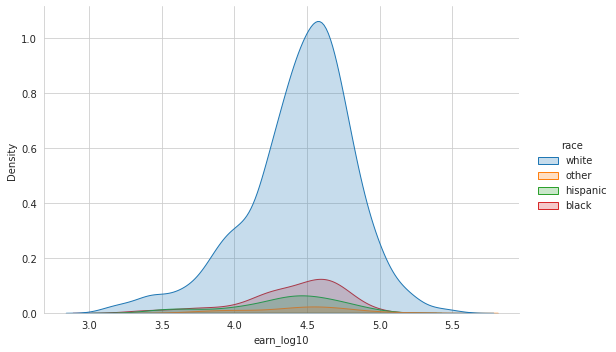

In [70]:
sns.displot(wages, x='earn_log10', kind='kde', hue='race', fill=True, aspect=1.5)
plt.show()
# przykład kiepskiego predyktora - zmienna "race"

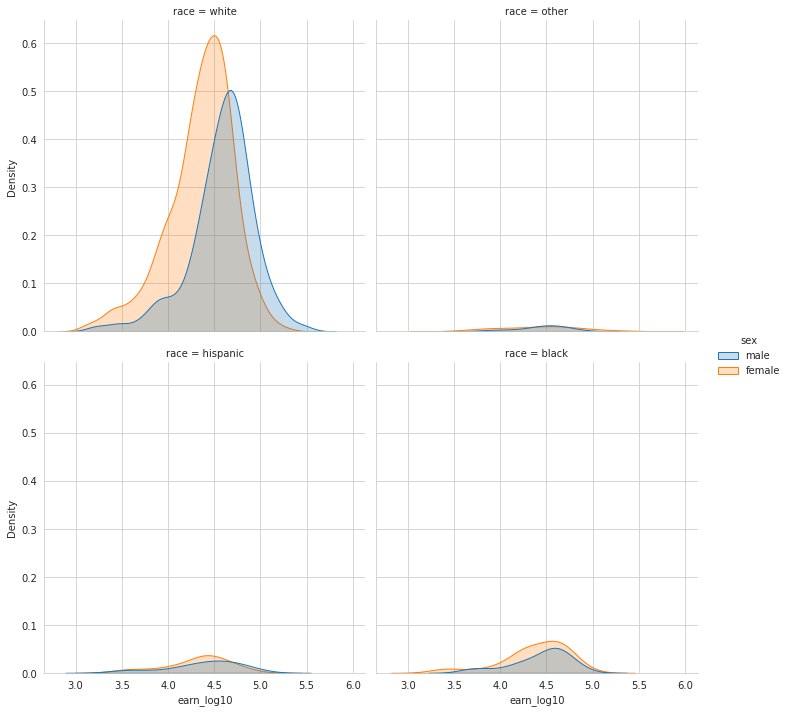

In [71]:
sns.displot(data=wages,
            x='earn_log10', # nasza zmienna celu
            hue='sex', # zmienna kategoryczna numer 1
            col='race', # zmienna kategoryczna numer 2
            kind='kde', # interesuje nas wykres gęstości
            fill=True, # pole pod krzywą wykresu zostanie wypełnione
            col_wrap=2 # rozdzieli nasze 4 rasy na 2 kolumny 
)
plt.show()

Raczej nie możemy podejrzewać, że istnieje istotna interakcja pomiędzy dwiema powyższymi zmiennymi. Brakuje tu znacznej separacji pomiędzy rozkładami. Separacja pomiędzy płciami dla rasy "white" wygląda niemal identycznie dla całej populacji.

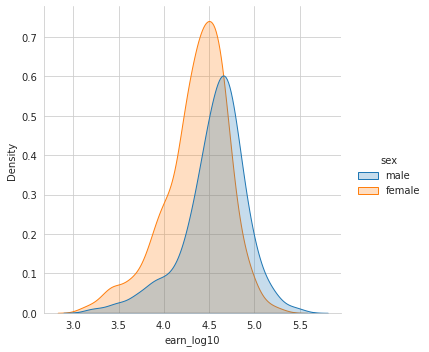

In [72]:
sns.displot(data=wages,
            x='earn_log10',
            hue='sex', 
            kind='kde',
            fill=True
)
plt.show()

##### 3. Narzędzie #3 - wykres słupkowy.

Możemy też spojrzeć na ten sam problem z nieco innej perspektywy, używając wykresu spłupkowego.

In [73]:
sns.barplot(data=wages,
            x='race',
            y='earn',
            hue='sex',
            estimator='mean', # jaka wartość będzie estymowana na osi y
            errorbar=('ci', 95) # ci 95 - Confidence Intervals - przedział ufności; 95 oznacza 95 procentowy przedział ufności
)
plt.show()
# errorbars - przedziały ufności dla średniej

TypeError: 'str' object is not callable

Co można odczytać z powyższego wykresu?
* Istnieje pewna dysproporcja w zarobkach pomiędzy kobietami i mężczyznami.
* Pionowe linie na każdym słupku wskazują na **przedziały ufności** dla estymowanej wartości (w typ przypadku, dla średniej, gdyż `estimator='mean'`.
* O widocznym efekcie w różnicy zarobków pomiędzy mężczyznami i kobietami możemy mówić tylko w przypadku rasy białej. Pozostałe zależności są wątpliwe i mogą wynikać np. ze zbyt małej liczby obserwacji. Zwróć uwagę, że większość osób, które brały udział w ankiecie, to osoby rasy białej.
* Jedynie dla rasy białej przedziału ufności dla obu płci nie mają części wspólnej. Innymi słowy, mamy co najmniej 95% pewności, że istnieje statystycznie istotna różnica w zarobkach pomiędzy płciami dla rasy białej.

In [74]:
wages.race.value_counts(normalize=True) # 82% ankietowanych, to osoby rasy białej

white       0.829698
black       0.093960
hispanic    0.055369
other       0.020973
Name: race, dtype: float64

In [75]:
wages.race.value_counts() # raptem 25 osób rasy "other"

white       989
black       112
hispanic     66
other        25
Name: race, dtype: int64

Najwyższa pora, by wprowadzić do naszego słownika kolejne pojęcie - przedziały ufności.

##### Przedziały ufności dla średniej - czym są?
95% przedziały ufności dla średniej to przedziały, które są używane do szacowania prawdziwej wartości średniej populacji na podstawie próby. Oznaczają, że jeśli powtarzalibyśmy próbkowanie i budowalibyśmy przedziały ufności wielokrotnie, to w 95% przypadków te przedziały pokryłyby prawdziwą wartość średniej populacji.

##### Przedziały ufności - po co są?
Przedziały ufności są przydatne w analizie danych, ponieważ pozwalają ocenić niepewność estymacji parametrów populacji na podstawie dostępnych danych próbkowych.

##### Przedziały ufności dla średniej - czym NIE są?
Przedziały ufności nie są tożsame z prawdopodobieństwem!

Przykładowo: jeżeli mamy przedziały ufności dla średniej na poziomie 95%, np. 170 - 180, to <u>nie oznacza to</u>, że z prawdopodobieństwem 95% prawdziwy średni wzrost dla populacji mieści się w zadanym przedziale.

> "W rzeczywistości kolejne średnie z próbek zawierają się w skonstruowanym przedziale z prawdopodobieństwem ok. 83,4% dla próbek z rozkładu normalnego" - [źródło](https://pl.wikipedia.org/wiki/Przedzia%C5%82_ufno%C5%9Bci#Interpretacja)

##### Przedziały ufności dla średniej - jak są liczone?
Do wyznaczenia przedziałów ufności zazwyczaj należ wybrać interesujący nas poziom ufności. Następnie przedziały są wyznaczane na podstawie wybranych parametrów próby, którą dysponujemy.

##### Przedziały ufności dla średniej - jak je interpretować?
Jeśli obliczyliśmy 95% przedział ufności dla średniej na podstawie naszej próby, oznacza to, że istnieje 95% pewność (lub ufność), że prawdziwa wartość średniej populacji znajduje się w tym przedziale.

Inaczej mówiąc, możemy być pewni na 95% (lub mieć 95% pewności), że przedział ufności obejmuje prawdziwą wartość średniej populacji.

##### Przedziały ufności - kontrowersje.
Czy rzeczywiście przedziały ufności uprawniają nas do przyjęcia, że z daną „ufnością” prawdziwa wartość parametru znajduje się w zaobserwowanym przedziale? Są co do tego różne opinie. Statystycy preferujący paradygmat bayesowski twierdzą, że nie. Więcej można o tym przeczytać pod [tym linkiem](https://pl.wikipedia.org/wiki/Przedzia%C5%82_ufno%C5%9Bci#Interpretacja).

Nie będziemy jednak wchodzić aż tak mocno w szczegóły i zaufamy twórcy metody (pochodzenia polskiego) i kilku już pokoleniom statystyków, którzy z niej korzystają. :-)

##### 4. Narzędzie #4 - wykres punktowy z prostą regresji.
Używamy go, gdy poszukujemy interakcji pomiędzy:
1. Dwiema zmiennymi objaśniającymi (kategoryczną i numeryczną), a zmienną celu (numeryczną).
2. Dwiema zmiennymi objaśniającymi (numerycznymi), a zmienną celu (kategoryczną)

In [ ]:
sns.lmplot(data=wages, x='age', y='earn', hue='sex', aspect=1.5)
plt.show()

Co moązna odczytać z powyższego wykresu?
* Prosta dla mężczyzn jest nachylona pod nieco większym kątem, niż prosta dla kobiet.
* Można podejrzewać, że wraz ze wzrostem lat, przychody mężczyzn rosną nieco szybciej niż kobiet.

In [ ]:
sns.lmplot(data=wages, x='ed', y='earn', hue='sex', aspect=1.5)
plt.show()

In [ ]:
# Dla porównania przykład, który nie działa.
sns.lmplot(data=wages, x='ed', y='earn', hue='race', aspect=1.5)
plt.show()

In [ ]:
# Możemy próbować zmienić zmienną celu na earn_log10 i "wyłuskać" nieznaczny efekt dla poszczególnych kategorii.
sns.lmplot(data=wages[wages.race.isin(['white', 'black'])], x='ed', y='earn', hue='race', aspect=1.5)
plt.show()

In [ ]:
# Pamiętajmy jednak, że zmienna "earn" jest dosyć mocno skośna. Użyjmy zamiast niej "earn_log10"
sns.lmplot(data=wages[wages.race.isin(['white', 'black'])], x='ed', y='earn_log10', hue='race', aspect=1.5)
plt.show()

**Do zrobienia**:
* W modelu regresji spróbować uwzględnić powyższe interakcje.

## Backup

Jak mógłby wyglądać modelowy przykład interakcji? Przypomnijmy sobie przykład z trawnikiem.

In [ ]:
trawa = pd.DataFrame({
    'nawoz':    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    'woda':     [9, 8, 3, 1, 0, 0, 0, 3, 4, 4, 5, 0, 1, 1, 5, 5, 6, 7, 8, 4, 1],
    'przyrost': [3, 3, 2, 2, 1, 1, 2, 6, 8, 9, 10, 2, 4, 5, 7, 3, 3, 3, 3, 2, 1]
})
trawa

Współczynnik R-kwadrat (R-squared) w regresji liniowej jest miarą dopasowania modelu do danych. Wskazuje, jak dobrze wartości przewidywane przez model regresyjny pasują do rzeczywistych wartości zależnej zmiennej. Wartość R-kwadrat mieści się w zakresie od 0 do 1, gdzie 0 oznacza, że model nie wyjaśnia w ogóle zmienności danych, a 1 oznacza idealne dopasowanie modelu.

Interpretacja R-kwadrat jest następująca:
* R-kwadrat równy 0 oznacza, że model nie jest w stanie wyjaśnić żadnej zmienności danych. Wszystkie przewidywane wartości są takie same, niezależnie od wartości zależnej zmiennej. Model jest zupełnie bezużyteczny w tym przypadku.
* R-kwadrat równy 1 oznacza, że model idealnie dopasowuje się do danych, a wszystkie przewidywane wartości pokrywają się z rzeczywistymi wartościami zależnej zmiennej. Oznacza to, że model jest w stanie w pełni wyjaśnić zmienność danych.
* R-kwadrat między 0 a 1 oznacza, że model jest w stanie wyjaśnić pewien odsetek zmienności danych. Im wyższa wartość R-kwadrat, tym lepsze dopasowanie modelu. Na przykład, R-kwadrat wynoszący 0,75 oznacza, że model wyjaśnia 75% zmienności danych.

In [ ]:
model = ols(formula='przyrost ~ nawoz:woda + woda', data=trawa).fit()
model.summary()
# R-squared dla różnych modeli:
# przyrost ~ nawoz             - 0.337
# przyrost ~ woda              - 0.066
# przyrost ~ nawoz + woda      - 0.647
# przyrost ~ nawoz : woda      - 0.879
# przyrost ~ nawoz:woda + woda - 0.905

In [ ]:
sns.lmplot(data=trawa, x='woda', y='przyrost', hue='nawoz', aspect=1.5)
plt.show()

---
Źródła:
* Reguła 3 sigm: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

Grafiki:
* Reguła 3 sigm: https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#/media/File:Empirical_rule_histogram.svg
* Trawnik: https://upload.wikimedia.org/wikipedia/commons/5/55/Lawn_16l07.JPG